# Body and wings extractor

This is an algorithm to extract bumblebee' body and wings separately.  
* [Load_video](#Load_video)

* [Save_videos](#Save_videos)

* [ROI](#ROI) 

* [Save_videos](#Save_videos)

* [Function_defined](#Function_defined)


* [Wing/Body_Extraction_with_Morphological_Transformation](#Wing/Body_Extraction_with_Morphological_Transformation)

* [Save_date2csv](#Save_date2csv)

* [Wing_angle](#Wing_angle)

* [Body_Orientation](#Body_Orientation)

* [Wing_frequency_analysis](#Wing_frequency_analysis)

## Change File_dir/Save_dir when analyzing a NEW video !!!! 

<a id = "Load_video"></a>
### Load_video

In [16]:
import cv2
import numpy as np
import time 
import matplotlib.pyplot as plt
import pandas as pd
#from scipy.ndimage.filters import gaussian_filter

#import pickle
%matplotlib inline

In [7]:
#File_dir = '/Video_Analysis/10_31/OC312003_S/'
#File_dir = 'Test_Case/
File_dir = 'fall_down_test_v11/'
#File_dir = ''
#cap = cv2.VideoCapture(File_dir + 'cam2_p38.tif')
cap = cv2.VideoCapture(File_dir + 'CAM1fall_down_test_v11.avi')
#fgbg = cv2.createBackgroundSubtractorMOG2() #backgroud substraction

In [8]:
#If the fps == 0, check your file directory 
def info(cap):
    fps = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    print('fps == %s\nwidth == %s\nheight == %s'%(fps,width,height))
    return fps,width,height
fps,width,height = info(cap)

fps == 4909.0
width == 1280.0
height == 800.0


In [9]:
def imgshow(img):
    cv2.imshow('Image',img)
    k=cv2.waitKey(0)
    if k==ord('s'):
        cv2.destroyAllWindows()

<b id = "ROI"></b>
### Region Of Interests



In [10]:
#define first frame
Start_frame = 0 # 4100
cap.set(cv2.CAP_PROP_POS_FRAMES, Start_frame) 
_,first_frame = cap.read()   #frame w/o trimming
#imgshow(first_frame)

In [11]:
# define ROI
roi_x = 500 #     v1cam1 x700   y 400  cam2fall down   600-400  300/250
roi_y =470 #     v2 cam1 x570  y470       cam2    x 400  y450  
roi_wth = 450#180  #     v3 cam1 x570  y450       cam2    x 400  y450  
roi_hght = 150#160     #  v4 cam1 x540  y470  180/125      cam2    x 400  y470  
                            #   v5 cam1 x540  y470  180/125      cam2    x 400  y470  
                     #   v6 cam1 x540  y470  180/150      cam2    x 400  y470 150/140
        #v7 cam1 x500  y500 300/100      cam2    x 400  y470 150/140
        #v8 cam1 x490 y520 450/100      cam2  x450 y530 350/100 
        #v9 cam1 x650 y470 380/150      cam2  x590 y440 200/150 
        # v10 cam1 x430 y500 220/100      cam2  x455 y500 220/110 
        # v11 cam1 x500 y470 450/150      cam2  x500 y470 450/150   0-1500 frames
        # v11 cam1 x600 y470 450/150      cam2  x380 y470 450/150    4100 - 4900 frames
        
roi = first_frame[roi_y:roi_y+roi_hght,roi_x:roi_x+roi_wth]

def draw_roi(roi,x,y,wth,hght):
    #Show the ROI 
    #roi: target frame
    #x,y: upper left point of the ROI
    #wth,hght: width and height of the ROI 
    cv2.rectangle(roi,(x,y),(x+wth,y+hght),(255,0,0),2)
    cv2.imshow('Detected',roi)
    k = cv2.waitKey(0)
    if k == ord('s'):
        cv2.destroyAllWindows()
#draw_roi(first_frame,roi_x,roi_y,roi_wth,roi_hght)
roi.shape

(150, 450, 3)

### Get 2D image points by clicking

In [103]:
mouseX = []
mouseY = []

In [104]:
def draw_circle(event,x,y,flags,param):
    #Get 2D points while left clicking mouse 
    #mouseX: X-axis coordinates for each clicled points
    #mouseY: Corresponding Y-axis
    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(first_frame,(x,y),2,(255,0,0),-1)
        print('frame == ', Start_frame + (step* iteration))
        mouseX.append(x)
        mouseY.append(y)

In [105]:
cv2.namedWindow('image')
cv2.setMouseCallback('image',draw_circle)

In [106]:
iteration = 0
step = 50 #frame step 
while(1):
    cv2.imshow('image',first_frame)
    k = cv2.waitKey(20) & 0xFF
    if k == 27:
        #Exit the loop while pressing 'Esc'
        print('All set!!!')
        break
    elif k == ord('q'):
        #Move to the next frame while pressing 'q'
        if (Start_frame+ (step* iteration)) > fps:
            print('last frame!!!')
            cap.set(cv2.CAP_PROP_POS_FRAMES, fps-1) 
            _,first_frame = cap.read()
            
        else: 
            cap.set(cv2.CAP_PROP_POS_FRAMES, (Start_frame + (step * iteration) ))
            _,first_frame = cap.read()
            iteration += 1 
        
    elif k == ord('a'):
        #Show 2D coordinates while pressing 'a'
        print (mouseX,mouseY)

frame ==  0
frame ==  0
frame ==  50
frame ==  50
frame ==  100
frame ==  100
frame ==  150
frame ==  150
frame ==  200
frame ==  200
frame ==  250
frame ==  250
frame ==  300
frame ==  300
frame ==  350
frame ==  350
frame ==  400
frame ==  400
frame ==  450
frame ==  450
frame ==  500
frame ==  500
frame ==  550
frame ==  550
frame ==  600
frame ==  600
frame ==  650
frame ==  650
frame ==  700
frame ==  700
frame ==  750
frame ==  750
frame ==  800
frame ==  800
frame ==  850
frame ==  850
frame ==  900
frame ==  900
frame ==  950
frame ==  950
frame ==  1000
frame ==  1000
frame ==  1050
frame ==  1050
frame ==  1100
frame ==  1100
frame ==  1150
frame ==  1150
frame ==  1200
frame ==  1200
frame ==  1250
frame ==  1250
frame ==  1300
frame ==  1300
frame ==  1350
frame ==  1350
frame ==  1400
frame ==  1400
frame ==  1450
frame ==  1450
frame ==  1500
frame ==  1500
All set!!!


In [107]:
mouseX_np = np.array(mouseX).reshape(2,-1,order = 'F')
mouseY_np = np.array(mouseY).reshape(2,-1,order = 'F')


In [108]:
ctr1 = np.vstack((mouseX_np[0,:],mouseY_np[0,:]))
ctr2 = np.vstack((mouseX_np[1,:],mouseY_np[1,:]))

ctr1.shape

(2, 31)

In [109]:
File_dir

'fall_down_test_v11/'

In [110]:
np.save(File_dir +'cam1_ctr1_1500.npy',ctr1)
np.save(File_dir +'cam1_ctr2_1500.npy',ctr2)

<a id = "Save_videos"> </a>
### Save_videos

In [7]:
# AVI for VirtualDub (*'DIVX')(not working on youtube )
# MP4 'X264' 'DVIX'
#fourcc = cv2.VideoWriter_fourcc(*'DIVX')
#frame_all = cv2.VideoWriter(File_dir + 'whole_frame.avi',fourcc,20.0,(int(width),int(height)))
#frame_Ellipse = cv2.VideoWriter('/Video_Analysis/11_1/cam1_NO011608_S/Ellipse.avi',fourcc,20.0,(roi.shape[1],roi.shape[0]))
#frame_And = cv2.VideoWriter('/Video_Analysis/11_1/cam1_NO011608_S/Add.avi',fourcc,20.0,(roi.shape[1],roi.shape[0]))
#frame_Wing = cv2.VideoWriter('/Video_Analysis/11_1/cam1_NO011608_S/Wing.avi',fourcc,20.0,(roi.shape[1],roi.shape[0]))
#frame_Body = cv2.VideoWriter('/Video_Analysis/11_1/cam1_NO011608_S/Body.avi',fourcc,20.0,(roi.shape[1],roi.shape[0]))
#frame_Wing_b = cv2.VideoWriter('/Video_Analysis/11_1/cam1_NO011608_S/Wing_black_dots.mp4',fourcc,20.0,(roi.shape[1],roi.shape[0]))

<a id = "Function_defined"></a>
### Function_defined

#### img_draw_body

In [12]:
# Draw an ellipse to describe body shape 
# Target the body contour based on BODY (contour) area
# angle unit in degree

def img_draw_body(img, img_cont,max_object_area,min_object_area):
    #Inputs: 
    #   img: color targeted image
    #   img_cont: corresponding binary image after ideal morphological transformations  
    #   max_object_area,min_object_area: the upper and lower bound of the body contour's area  
    #Outputs:
    #   angle: ellipse orientation in degree (the angle between y-axis and ellipse's major axis,y-axis downward, clockwise)
    #   cen_pos: ellipse center (x,y)
    #   ellipse: include all the infomation of generated ellipse (angle,cen_pos,axis)
    #   true_length: Major axis length after reconstruction in unit mm 

    _,contours,hierarchy_1 = cv2.findContours(img_cont,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)
    for kk in range(len(contours)):
        if (cv2.contourArea(contours[kk]) > min_object_area) and (cv2.contourArea(contours[kk]) <max_object_area):
            cnt = contours[kk]
            rect = cv2.minAreaRect(cnt)
            #print('orientation == ', rect[-1])
            if rect[-1] < 0:
                temp_angle = 90 + rect[-1]
            else:
                temp_angle = rect[-1]
            
            #print('temp_angle',temp_angle)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            #print('box === ',box)
            L = np.linalg.norm(abs(box[0]-box[-1]))
            #print('L',L)
            
            ellipse = cv2.fitEllipse(cnt)
            #info_ellipse.append(ellipse)""
            
            cv2.drawContours(img,[box],0,(255,0,255),1)
            cv2.ellipse(img,ellipse,(0,0,255),1)
            
            angle = ellipse[2]
            cen_pos = ellipse[0]
            true_length = L/(np.cos((temp_angle - angle)*np.pi/180))
            #print('angle ',angle)
            #print('true_length',true_length)
            
            '''angle.append(ellipse[2])
            cen_pos.append(ellipse[0])'''
            return angle,cen_pos,ellipse,true_length

                

#### img_draw_wing

In [9]:
# Draw certain ellipses based on WING area
# angle unit in degree
#if wing area is less than 5 pixels, the ellipse can not be generated. 
def img_draw_wing(img, img_cont,thre):
    #Inputs: 
    #   img: color targeted image
    #   img_cont: corresponding binary image after ideal morphological transformations  
    #   thre: Minimal wings' contour areas in order to generate a proper ellipse
    #If the wing's area is too small, the best-fitted ellipse won't reflect properly wing's orientation in 2D   
        
    #Outputs:
    #   Wing_angle_0: ellipse orientation in degree (the angle between y-axis and ellipse's major axis,y-axis downward, clockwise)
    #   Wing_angle_1: ellipse orientation in degree (the angle between y-axis and ellipse's major axis,y-axis downward, clockwise)
    Wing_angle = []
    Wing_angle_0 = []
    Wing_angle_1 = []
    cen_pos =[]
    cnt_area = np.ones((2,1))
    _,contours,hierarchy = cv2.findContours(img_cont,cv2.RETR_LIST,cv2.CHAIN_APPROX_NONE)
    
    Wing_area_cnt =np. array( [cv2.contourArea(contours[kk]) for kk in  range (len(contours))])
    #print(roi_area_cnt)
    Wing_Index = np.unravel_index(np.argsort(Wing_area_cnt.ravel())[-2:],Wing_area_cnt.shape) 
    #print(Wing_Index)
    #Wing_contours = [contours[Wing_Index[0][ii]] for ii in range (2)]
    
    for i in range (len(Wing_Index[0])):
        cnt = contours[Wing_Index[0][i]]
        cnt_area[i] = cv2.contourArea(cnt)
        #print(len(cnt))
        if len(cnt) > 5 :
            rect = cv2.minAreaRect(cnt)
            box = cv2.boxPoints(rect)
            box = np.int0(box)
            ellipse = cv2.fitEllipse(cnt)
            cen_pos.append(ellipse[0])
            Wing_angle.append(ellipse[2])
            '''if (ellipse[2] > 150) :
                Wing_angle.append(180 - ellipse[2])
            else :
                Wing_angle.append(ellipse[2])'''
            
            if cnt_area[i] > thre:
                
                cv2.ellipse(img,ellipse,(0,255,255),1)

    if len(Wing_angle) == 2:
    #Based on two wings center positions to distribute each orientations to the right elipse 
    #If wing area is too small, ignore that wing contour.
        if cen_pos[0][1] > cen_pos[1][1]:
            if (cnt_area[1] < thre):
                if (cnt_area[0] > thre):
                    Wing_angle_0 = Wing_angle[0]
                    Wing_angle_1 = None
                else:
                    Wing_angle_0 = None
                    Wing_angle_1 = None
                    
            else:
                if (cnt_area[0] > thre):
                    Wing_angle_0 = Wing_angle[0]
                    Wing_angle_1 = Wing_angle[1] 
                else:
                    Wing_angle_0 = None
                    Wing_angle_1 = Wing_angle[1]
                
                
                
        else:
            if (cnt_area[1] < thre):

                if (cnt_area[0] > thre):
                    Wing_angle_0 = None
                    Wing_angle_1 = Wing_angle[0]
                else:
                    Wing_angle_0 = None
                    Wing_angle_1 = None
                    
            else:
                if (cnt_area[0] > thre):
                    Wing_angle_0 = Wing_angle[1]
                    Wing_angle_1 = Wing_angle[0] 
                else:
                    Wing_angle_0 = Wing_angle[1]
                    Wing_angle_1 = None

            
    else :
        Wing_angle_0 = None
        Wing_angle_1 = None 
    return Wing_angle_0,Wing_angle_1


<a id = "Wing/Body_Extraction_with_Morphological_Transformation"></a>
### Wing/Body_Extraction_with_Morphological_Transformation

In [15]:
#store each frame into array
#Adjust threshold parameters to get a better resolution. 




Frames_needed = 1500-Start_frame
#fgbg = cv2.createBackgroundSubtractorMOG2(history = 1000,varThreshold = 20, detectShadows = 0)
#frame_whole = np.zeros((Frames_needed, int(height),int(width),3 ),np.uint8)
test = np.zeros((Frames_needed, roi.shape[0], roi.shape[1],3),np.uint8)
frame_np = np.zeros((Frames_needed, roi.shape[0], roi.shape[1]),np.uint8)
frame_thre_body = frame_np.copy()
#fgmask = np.zeros((Frames_needed, roi.shape[0], roi.shape[1]),np.uint8)
frame_sub = np.zeros((frame_np.shape[0],frame_np.shape[1],frame_np.shape[2]),np.uint8)
angle = []
pos = []
axis = []
Length_esti = []
for jj,ii in enumerate (range (Start_frame,1500)):  #1500 
    cap.set(cv2.CAP_PROP_POS_FRAMES, ii)
    ret,frame_whole=cap.read()
    frame = frame_whole[roi_y: roi_y+roi_hght,roi_x:roi_x+roi_wth ]

    if ret == True:      
        kernel_1 = np.ones((3,3),np.uint8)
        kernel_2 = np.ones((2,2),np.uint8)
        kernel_3 = np.ones((3,3),np.uint8)
        frame_np[jj,:,:]  = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        
        #frame_sub[jj] = frame_np[jj]-frame_BKG_g
        thre_ret_b,frame_thre_body[jj] = cv2.threshold(frame_np[jj],20,255,cv2.THRESH_BINARY_INV)  #v11  16 20
        #median = cv2.medianBlur(frame_thre_body[jj],3)
        frame_thre_body[jj] = cv2.morphologyEx(frame_thre_body[jj],cv2.MORPH_OPEN,kernel_1)
        
        frame_thre_wing = cv2.morphologyEx(frame_thre_body[jj],cv2.MORPH_OPEN,kernel_3,iterations = 2)
        
        temp_angle, temp_pos,info_eps,L = img_draw_body(frame,frame_thre_body[jj],7000,1500) #1500 v3
        angle.append(temp_angle)
        pos.append(temp_pos)
        axis.append(info_eps[1])
        Length_esti.append(L)
        _,test[jj] = cv2.threshold(frame,15,255,cv2.THRESH_BINARY_INV)
        
        #frame_Gaussian[jj] = gaussian_filter(frame_thre_body[jj],sigma = 3)
        #fgmask[jj,:,:] = fgbg.apply(frame_thre_wing)
        #test = fgbg.apply(frame_thre_wing)  
        #Gaussian = fgbg.apply(frame_Gaussian[jj])  
        cv2.imshow('test',test[jj])
        cv2.imshow('frame_sub',frame_np[jj])
        cv2.imshow('frame_thre_body', frame_thre_wing)
        cv2.imshow('Gaussian_thre',frame_thre_body[jj])
        #cv2.imshow('Median',median)
        #cv2.imshow('fgmask',fgmask[jj])
        #cv2.imshow('Substraction',test)
        #cv2.imshow('frame_thre_wing',frame_thre_wing)
        cv2.imshow('frame',frame)
        
        #cv2.imshow('framewholr',frame_whole[jj])
        
        if cv2.waitKey(1)&0xFF == ord('s'):
            cv2.destroyAllWindows()
            break
    else:
        cv2.destroyAllWindows()
        break
cv2.destroyAllWindows()

In [57]:
axis_np = np.array(axis)
axis_np.shape

(1500, 2)

In [58]:
axis_np[:,1]-Length_esti

array([-5.92726262, -5.3424384 , -4.91564805, ..., -2.49940203,
       -2.69215858, -3.99040982])

In [59]:
final_pos = pos +np.array([roi_x,roi_y])

In [61]:
#Save all data to the npy files
#np.save(File_dir + 'cam2_pos1500.npy',final_pos)
#np.save(File_dir +'cam2_angle1500.npy',angle)
#np.save(File_dir +'cam2_axis1500.npy',axis_np)
#np.save(File_dir +'cam1_axis1.npy',axis_np[:,1])

np.save(File_dir +'cam2_axis_length_est.npy',Length_esti)

In [43]:
_, frame_test = cv2.threshold(frame_np[0],25,255,cv2.THRESH_BINARY_INV)
imgshow(frame_test)

In [23]:
test = np.zeros((Frames_needed, roi.shape[0], roi.shape[1],3),np.uint8)


In [13]:
import matplotlib.animation as animation
from matplotlib import animation, rc
from IPython.display import HTML, Image
from matplotlib.animation import FuncAnimation
frame_whole.shape
test.shape

(1500, 150, 450, 3)

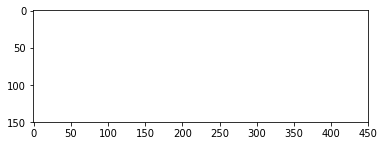

In [23]:
## Save np.array to animation 
#Inputs:
#   frame_whole.shape[0]: fps
#   test[i]: targeted array

fig = plt.figure()

ims = []
for i in range(frame_whole.shape[0]):

    im = plt.imshow(test[i], animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=5, blit=True,
                                repeat_delay=1000)

# ani.save('dynamic_images.mp4')

plt.show()

In [24]:
ani.save(File_dir + "V5_CAM1.mp4",fps = 150,bitrate = 72000)

In [362]:
rc('animation', html='html5')
ani

<a id = "Save_date2csv"></a>
### Save_date2csv

In [66]:
Wing_angle_0_np = np.array(Wing_angle_0) 
Wing_angle_1_np = np.array(Wing_angle_1)
angle_np = np.array(angle)

In [68]:
df_W0 = pd.DataFrame(Wing_angle_0_np);
df_W1 = pd.DataFrame(Wing_angle_1_np);
angle_np = pd.DataFrame(angle);

In [69]:
Save_dir = '/Video_Analysis/11_1/cam1_NO011608_S/'

df_W0.to_csv(Save_dir+'Wing_angle0.csv')
df_W1.to_csv(Save_dir+'Wing_angle1.csv')
angle_np.to_csv(Save_dir+'Body_orientation.csv')

<a id = "Wing_angle"></a>
### Wing_angle 

In [99]:
Wing_angle_0[89]

171.94683837890625

In [122]:
Wing_angle_0_unwrap = np.zeros((1300,1))
for i in range (len(Wing_angle_0_np[0:1300])):
    
    if Wing_angle_0_np[i] == None:
        Wing_angle_0_unwrap[i] = Wing_angle_0_np[i]
    else:
        if (Wing_angle_0_np [i] >160.0):
            Wing_angle_0_unwrap[i] = (Wing_angle_0_np[i]-180)
        else :
            Wing_angle_0_unwrap[i] = (Wing_angle_0_np[i])

In [137]:
df_W0_unwrap = pd.DataFrame(Wing_angle_0_unwrap);
df_W0_unwrap.to_csv(Save_dir+'Wing_angle0_unwrap.csv')

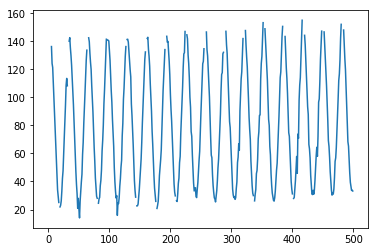

In [134]:
plt.plot(Wing_angle_0_unwrap[700:1200])
plt.savefig(Save_dir+'Wing_angle_0_unwrap.png')

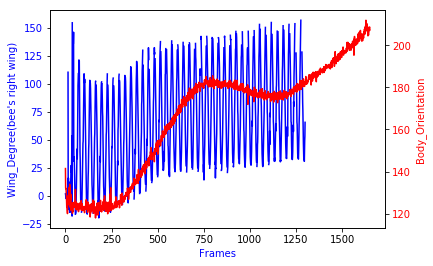

In [136]:
fig,ax1 = plt.subplots()
ax1.plot(Wing_angle_0_unwrap, color = "blue")
ax1.set_ylabel(r"Wing_Degree(bee's right wing)",color = "blue")
ax1.set_xlabel (r"Frames",color = "blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(angle,color = "red")
ax2.set_ylabel(r"Body_Orientation",color = "red")
for label in ax2.get_yticklabels():
    label.set_color("red")
plt.savefig(Save_dir+'RWing_angle_body_orien.png')

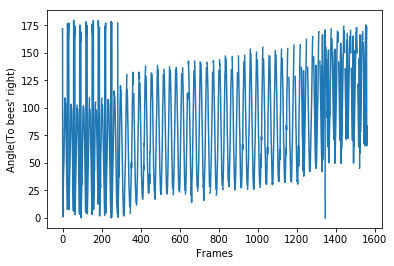

In [71]:
# start with 89 frames

plt.xlabel('Frames')
plt.ylabel('Angle(To bees\' right)')
plt.plot(Wing_angle_0[89:])
plt.savefig(Save_dir+'Wing_angle_0.png')

In [145]:
Wing_angle_1_unwrap = np.zeros((1300,1))
for i in range (len(Wing_angle_1_np[0:1300])):
    
    if Wing_angle_1_np[i] == None:
        Wing_angle_1_unwrap[i] = Wing_angle_1_np[i]
    else:
        if (Wing_angle_1_np[i] >75.0):
            Wing_angle_1_unwrap[i] = (Wing_angle_1_np[i]-180)
        else :
            Wing_angle_1_unwrap[i] = (Wing_angle_1_np[i])

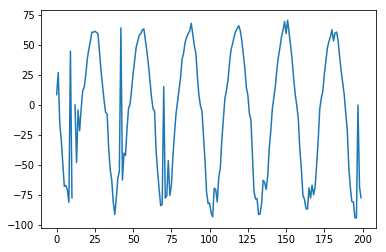

In [146]:
plt.plot(Wing_angle_1_unwrap[0:200])

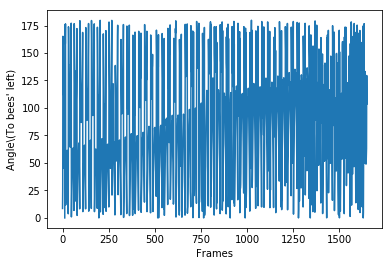

In [133]:
plt.xlabel('Frames')
plt.ylabel('Angle\(To bees\' left)')
plt.plot(Wing_angle_1)
plt.savefig(Save_dir+'Wing_angle_1.png')

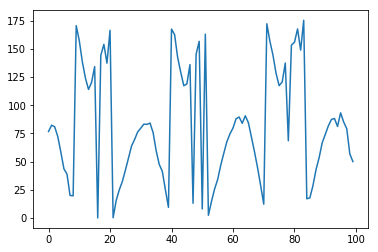

In [82]:
plt.plot(Wing_angle_1[500:600])

<a id = "Body_orientation" > </a>
### Body_Orientation

In [31]:
len(angle)

1662

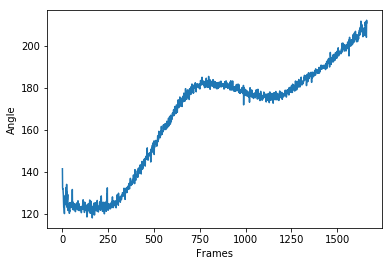

In [48]:
plt.xlabel('Frames')
plt.ylabel('Angle')
plt.plot(angle)
plt.savefig(Save_dir+'Orientation.png')

<a id = "Wing_frequency_analysis"> </a>
### Wing_frequency_analysis

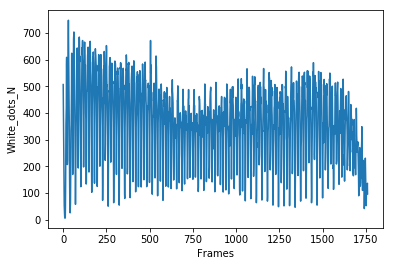

In [12]:
N = np.array(N)
plt.xlabel('Frames')
plt.ylabel('White_dots_N')
plt.plot(N)
plt.savefig(Save_dir+'White_dots.png')
#plt.plot(M)

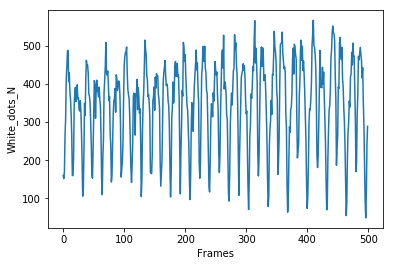

In [13]:
plt.xlabel('Frames')
plt.ylabel('White_dots_N')
plt.plot(N[749:1249])
plt.savefig(Save_dir+'White_dots_750_1250.png')
#plt.plot(M)

1662

In [40]:
# Wing frenquency calculator
# Threshold
def Wing_fre(pps,N,Threshold):
    min_dots = []
    min_dots_N = []
    i = 0
    while i < N.shape[0]-1:
        if (N[i] < N[i+1] and N[i] < N[i-1] and
            N[i] < Threshold):
            min_dots.append(N[i])
            min_dots_N.append(i)
        i+=1
    min_dots_N_frame = min_dots_N[1:]   # delete first untrusted point 
    min_dots_N_frame  = np.array(min_dots_N_frame )   #The frames of relative minimum dots 
    ii = 0
    j = 0
    fre = np.zeros(2*int(min_dots_N_frame.shape[0]/3))
    stroke = np.zeros(2*int(min_dots_N_frame.shape[0]/3))
    while ii < min_dots_N_frame.shape[0]-2:
        fre[j] = pps/(min_dots_N_frame[ii+2] - min_dots_N_frame[ii])
        fre[j+1]= pps/(min_dots_N_frame[ii+2] - min_dots_N_frame[ii])
        stroke[j] = min_dots_N_frame[ii]
        stroke[j+1] =  min_dots_N_frame[ii+2]
        ii += 3
        j += 2
    return fre ,stroke

In [41]:
fre_test, stroke_test = Wing_fre(5200,np.array(N),250)

In [45]:
stroke_test

array([  12.,   40.,   55.,   87.,  102.,  133.,  149.,  181.,  197.,
        228.,  243.,  275.,  292.,  324.,  340.,  371.,  387.,  419.,
        435.,  467.,  483.,  515.,  531.,  562.,  577.,  608.,  624.,
        656.,  671.,  702.,  719.,  750.,  781.,  813.,  828.,  861.,
        877.,  909.,  925.,  957.,  973., 1005., 1021., 1053., 1069.,
       1101., 1117., 1149., 1166., 1197., 1213., 1245., 1261., 1293.,
       1309., 1341., 1358., 1390., 1404., 1436., 1453., 1484., 1500.,
       1532., 1548., 1563., 1580., 1611., 1624., 1643.])

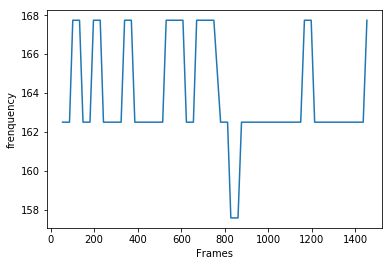

In [47]:
plt.xlabel('Frames')
plt.ylabel('frenquency')
#plt.plot(N)
plt.plot(stroke_test[2:-9],fre_test[2:-9])
plt.savefig(Save_dir+'frenquency.png')

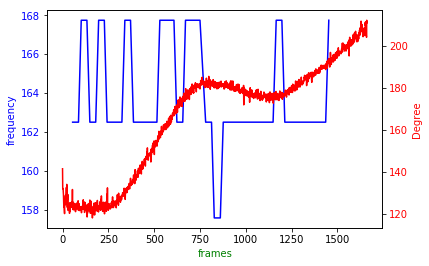

In [54]:
fig,ax1 = plt.subplots()
ax1.plot(stroke_test[2:-9],fre_test[2:-9], color = "blue")
ax1.set_ylabel(r"frequency",color = "blue")
ax1.set_xlabel (r"frames",color = "green")
for label in ax1.get_yticklabels():
    label.set_color("blue")
ax2 = ax1.twinx()
ax2.plot(angle,color = "red")
ax2.set_ylabel(r"Degree",color = "red")
for label in ax2.get_yticklabels():
    label.set_color("red")


    
plt.savefig(Save_dir+'frenquency_angle.png')